In [1]:
%matplotlib notebook
import control
import matplotlib.pyplot as plt
import numpy as np

s = control.tf([1,0],[0,1])

<IPython.core.display.Javascript object>


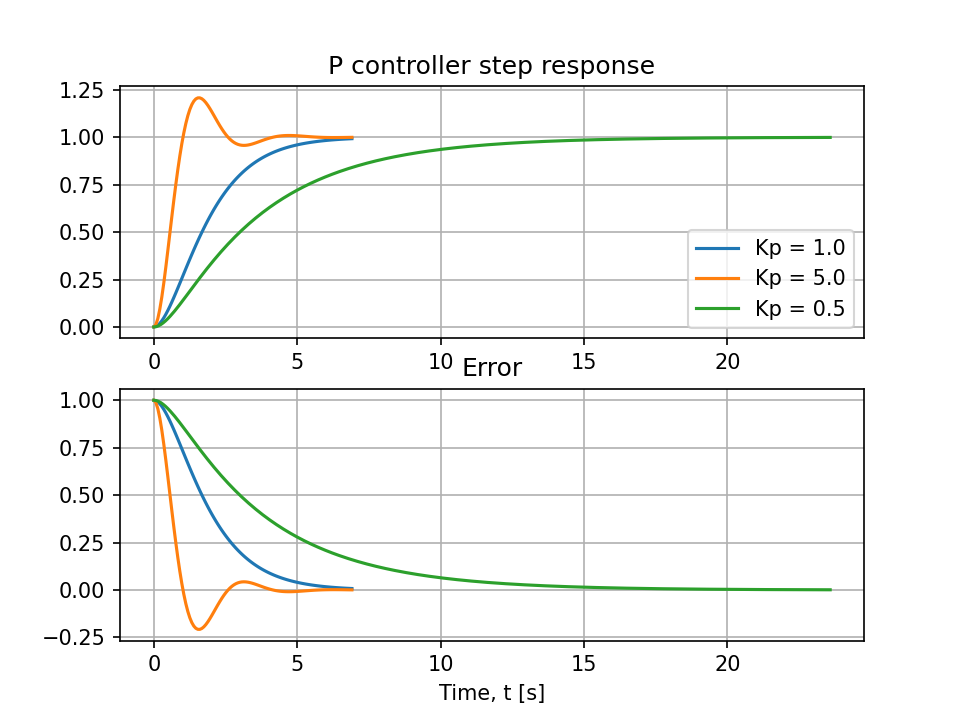

Text(0.5, 0, 'Time, t [s]')

In [15]:
#Ch22 p552
#Proportional controller

ess = []
Kp=np.array([1,5,0.5])

Gp = control.tf([0,0,1],[1,2,0]) # Plant transfer function = 1/s(s+2)
fig, (ax1, ax2) = plt.subplots(2)

for Kpi in Kp:
    T = control.feedback(Kpi*Gp,1,-1) 
    t, x = control.step_response(T)
    e = 1 - x #unit step response
    ax1.plot(t,x,label='Kp = {0}'.format(Kpi))
    ax2.plot(t,e)
    ess.append(e[-1])

ax1.set_title('P controller step response')
ax1.legend()
ax1.grid(True)

ax2.set_title('Error')
ax2.grid(True)
ax2.set_xlabel('Time, t [s]')




<IPython.core.display.Javascript object>


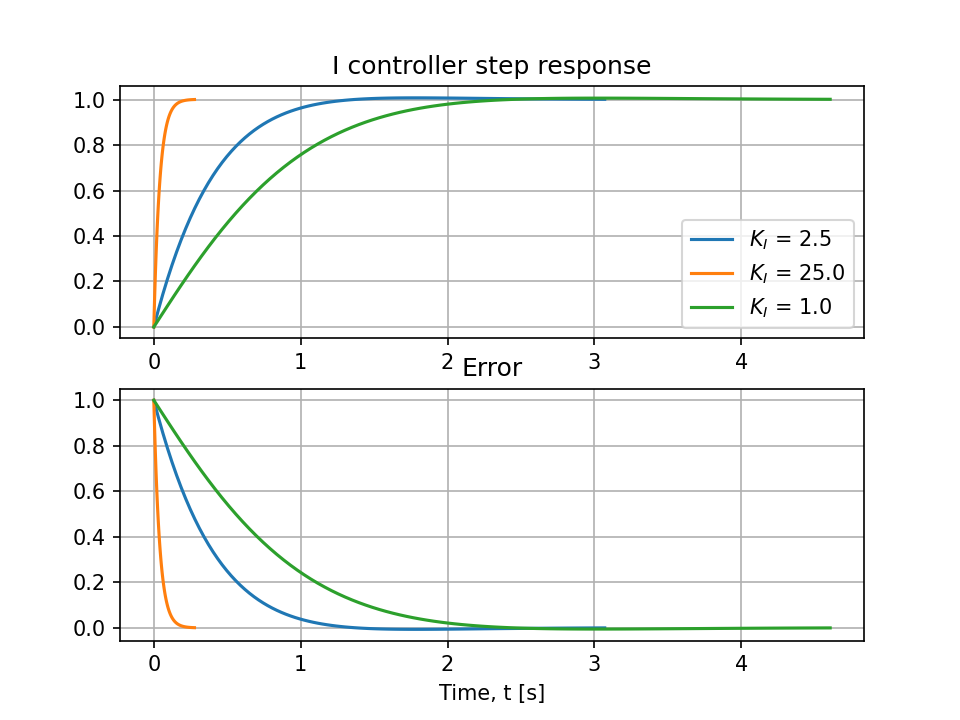

Text(0.5, 0, 'Time, t [s]')

In [14]:
#Ch22 p555
#Integral controller

tau = 0.1
Kic = 1/4/tau
Ki=np.array([Kic,Kic*10,1])
ess = []


ess = []
Kp=np.array([1,5,0.5])

Gp = control.tf([0,0,1],[1,2,0]) # Plant transfer function = 1/s(s+2)
fig, (ax1, ax2) = plt.subplots(2)

for Kii in Ki:
    Kis = control.tf([0,Kii],[1,0])
    G = control.parallel(Kis,Gp)
    T = control.feedback(G,1,-1) 
    
    t, x = control.step_response(T)
    e = 1 - x #unit step response
    ax1.plot(t,x,label='$K_I$ = {0}'.format(Kii))
    ax2.plot(t,e)
    ess.append(e[-1])

ax1.set_title('I controller step response')
ax1.legend()
ax1.grid(True)

ax2.set_title('Error')
ax2.grid(True)
ax2.set_xlabel('Time, t [s]')


<IPython.core.display.Javascript object>


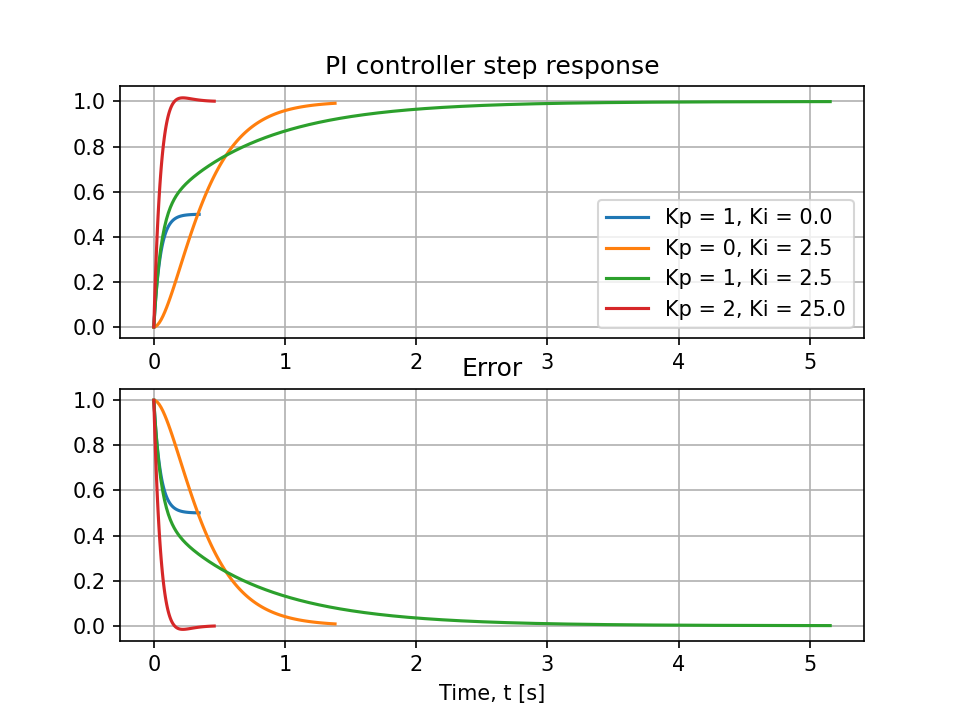

ess: [0.500500000000001, 0.007907755278981021, 0.000500000000010381, -0.0014121818471479752]


In [20]:
#PI controller
tau = 0.1
G1 = control.tf([0,1],[tau,1])
Kic = 1/4/tau

Ki=np.array([0,Kic,Kic,Kic*10])
Kp=np.array([1,0,1,2])
ess = []


fig, (ax1, ax2) = plt.subplots(2)

for ii in range(0,len(Ki)):
    I = control.tf([0, Ki[ii]],[1,0])
    P = control.tf([0, Kp[ii]],[0,1])
    PI = control.parallel(P,I)
    T = control.feedback(PI*G1,1,-1)
    
    t, x = control.step_response(T)
    e = 1-x
    ax1.plot(t,x,label='Kp = {0}, Ki = {1}'.format(Kp[ii],Ki[ii]))
    ax2.plot(t,e)
    ess.append(e[-1])

ax1.set_title('PI controller step response')
ax1.legend()
ax1.grid(True)

ax2.set_title('Error')
ax2.grid(True)
ax2.set_xlabel('Time, t [s]')

print('ess:',ess)